**Table of contents**<a id='toc0_'></a>    
1. [About Dataset](#toc1_)    
1.1. [Context](#toc1_1_)    
2. [Preparing the data](#toc2_)    
2.1. [Data Attributes](#toc2_1_)    
2.2. [Feature Engineering](#toc2_2_)    
2.2.1. [E-Mail Provider](#toc2_2_1_)    
2.2.2. [Address](#toc2_2_2_)    
2.2.3. [Avatar](#toc2_2_3_)    
3. [EDA](#toc3_)    
3.1. [Target](#toc3_1_)    
3.2. [Heatemap and Correlation](#toc3_2_)    
3.3. [Bi-varaite Analysis](#toc3_3_)    
4. [Machine Learning](#toc4_)    
4.1. [Preprocessing](#toc4_1_)    
4.1.1. [Scaling](#toc4_1_1_)    
4.1.2. [Winsorizing](#toc4_1_2_)    
5. [Linear Regression](#toc5_)    
5.1.1. [evaluation](#toc5_1_1_)    
6. [Conclusion](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>About Dataset [&#9650;](#toc0_)

## 1.1. <a id='toc1_1_'></a>Context [&#9650;](#toc0_)

This dataset has data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

We work with a company’s e-commerce customer CSV file. This file contains customer information such as email, address, and a colored avatar. Additionally, there are the following columns with numerical variables:”
* Avg. Session Length: average length of in-store style advice sessions in minutes
* Time on App: average time spent on the app in minutes
* Time on Website: average time spent on the website in minutes
* Length of Membership: how many years the customer has been a member
* Yearly Amount Spent: the average yearly amount spent by the customer in dollars


In [1]:
# Generate requirements.txt file
!pip freeze > requirements.txt

In [43]:
# import subprocess
# import sys
# # List of modules to install
# modules_to_install = [
#     "pandas",
#     "numpy",
#     "matplotlib",
#     "seaborn",
#     "plotly",
#     "scikit-learn",
#     "kaleido",
#     "Pillow",
#     "nbformat",
# ]

# # Install the modules

# for module in modules_to_install:
#     subprocess.check_call([sys.executable, "-m", "pip", "install", module])

In [44]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'vscode+png'

# ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, make_scorer

# png export
import kaleido
from PIL import Image
import os

In [45]:
df_ecommerce_raw = pd.read_csv("../data_csv/EcommerceCustomers.csv")
df_ecommerce = df_ecommerce_raw.copy()

We will build a linear model to decide whether the mobile app experience or the website is contributing more to the amount customers spend per year.

# 2. <a id='toc2_'></a>Preparing the data [&#9650;](#toc0_)

Extractions:  
- E-mail provider from Email --> delete Email
- Adress: housenumber, street, city name, state, ZIP+extended

In [46]:
df_ecommerce.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## 2.1. <a id='toc2_1_'></a>Data Attributes [&#9650;](#toc0_)

There is no missing data nor dublicates. We have 500 datapoints and only 138 Avatars.  
  
Extractions:
- Avatar: coloration

In [47]:
def attributes(df):
    print(f"df_titles dimensions {df.shape}")
    df_attributes = pd.DataFrame(df.dtypes, columns=["dtype"])
    df_attributes["NaN-Values"] = df.isna().sum().values
    df_attributes["% NaN-Values"] = (df.isna().sum().values / df.shape[0] * 100).round(2)
    df_attributes["Dublicates"] = df.duplicated().sum()
    df_attributes["unique"] = df.nunique().values
    return df_attributes
attributes(df_ecommerce)

df_titles dimensions (500, 8)


,dtype,NaN-Values,% NaN-Values,Dublicates,unique
Email,object,0,0.0,0,500
Address,object,0,0.0,0,500
Avatar,object,0,0.0,0,138
Avg. Session Length,float64,0,0.0,0,500
Time on App,float64,0,0.0,0,500
Time on Website,float64,0,0.0,0,500
Length of Membership,float64,0,0.0,0,500
Yearly Amount Spent,float64,0,0.0,0,500


In [48]:
df_ecommerce.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.05,0.99,29.53,32.34,33.08,33.71,36.14
Time on App,500.0,12.05,0.99,8.51,11.39,11.98,12.75,15.13
Time on Website,500.0,37.06,1.01,33.91,36.35,37.07,37.72,40.01
Length of Membership,500.0,3.53,1.00,0.27,2.93,3.53,4.13,6.92
Yearly Amount Spent,500.0,499.31,79.31,256.67,445.04,498.89,549.31,765.52


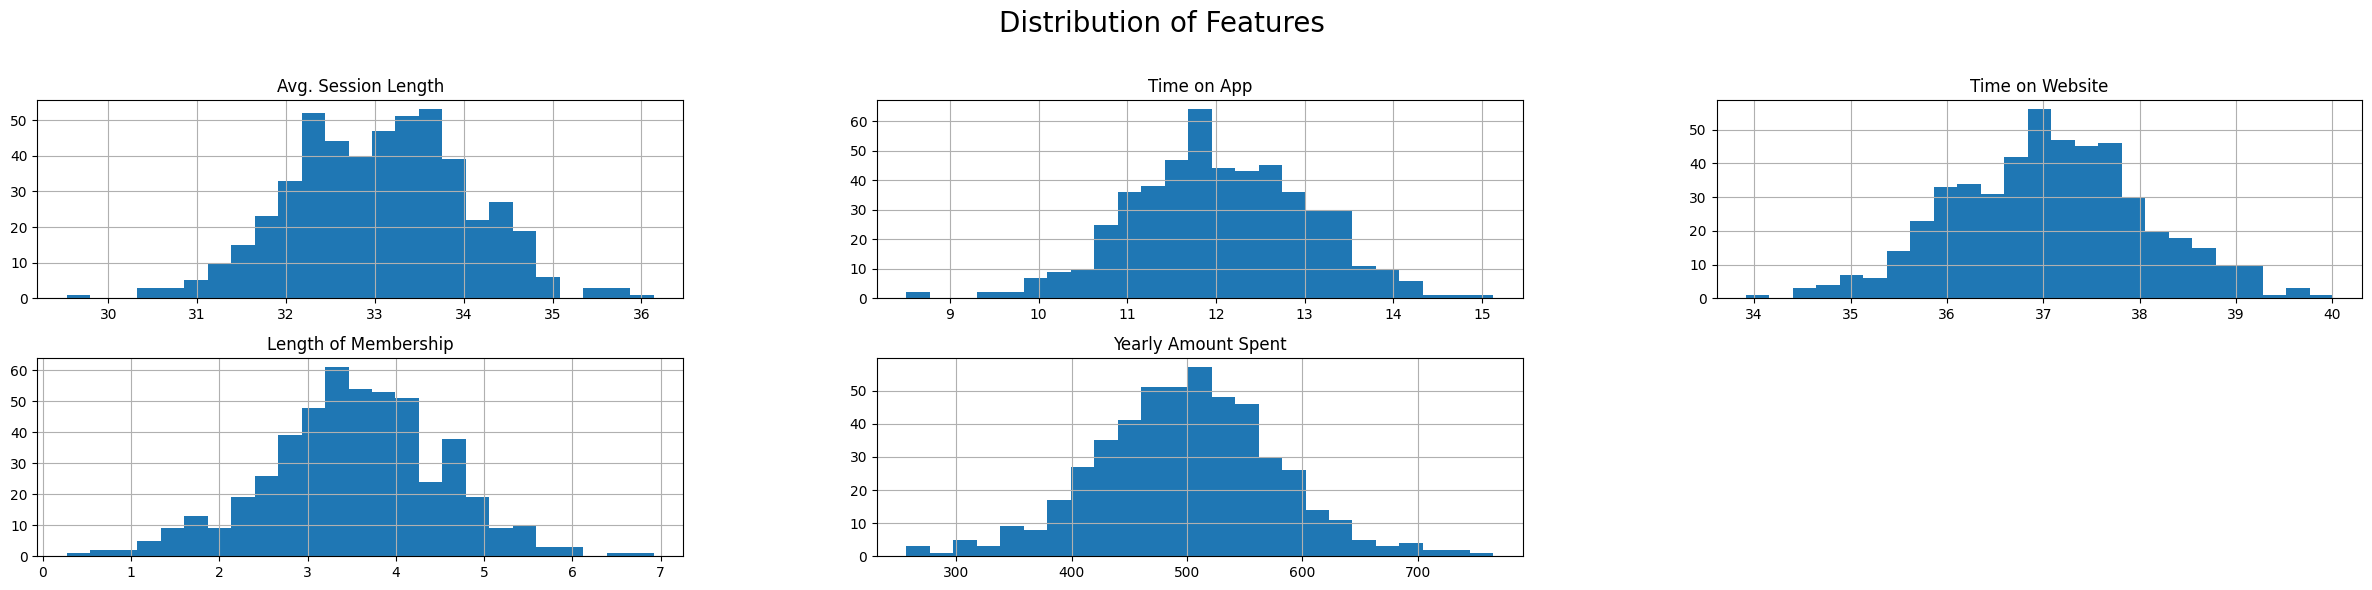

In [49]:
# Plot the histogram
df_ecommerce.hist(bins=25, figsize=(30, 30), layout=(10, 3))
plt.subplots_adjust(top=0.95)
plt.suptitle('Distribution of Features', fontsize=20)

# Save the plot as a PNG file
plt.savefig('../images/distribution_of_features.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


## 2.2. <a id='toc2_2_'></a>Feature Engineering [&#9650;](#toc0_)

Extractions:  
- E-mail provider from Email --> delete Email
- Adress: housenumber, street, city name, state, ZIP+extended
- Avatar: coloration

### 2.2.1. <a id='toc2_2_1_'></a>E-Mail Provider [&#9650;](#toc0_)

In [50]:
df_ecommerce["Provider"] = df_ecommerce["Email"].apply(lambda x: x.split("@")[1].split(".")[0])
df_ecommerce.Provider

0            fernandez
1              hotmail
2                yahoo
3                gmail
4      davidson-herman
            ...       
495        craig-evans
496              gmail
497            hotmail
498            hotmail
499           davidson
Name: Provider, Length: 500, dtype: object

Most e-mail brands used are gmail, hotmail and yahoo. In the next step, we will combine the rest into one group.

In [51]:
# Calculate the percentages
gmail_percentage = df_ecommerce.Provider.value_counts().loc['gmail'] / df_ecommerce.shape[0] * 100
hotmail_percentage = df_ecommerce.Provider.value_counts().loc['hotmail'] / df_ecommerce.shape[0] * 100
yahoo_percentage = df_ecommerce.Provider.value_counts().loc['yahoo'] / df_ecommerce.shape[0] * 100
total_percentage = (gmail_percentage + hotmail_percentage + yahoo_percentage)

# Create a DataFrame
provider_percentages = pd.DataFrame({
    'Provider': ['Gmail', 'Hotmail', 'Yahoo', 'Total'],
    'Percentage': [gmail_percentage, hotmail_percentage, yahoo_percentage, total_percentage]
})

# Display the DataFrame
print(df_ecommerce.Provider.value_counts())
provider_percentages

Provider
gmail             87
hotmail           87
yahoo             76
jones              3
johnson            3
                  ..
carson-hansen      1
scott              1
bennett-branch     1
ellis-parker       1
davidson           1
Name: count, Length: 236, dtype: int64


,Provider,Percentage
0,Gmail,17.4
1,Hotmail,17.4
2,Yahoo,15.2
3,Total,50.0


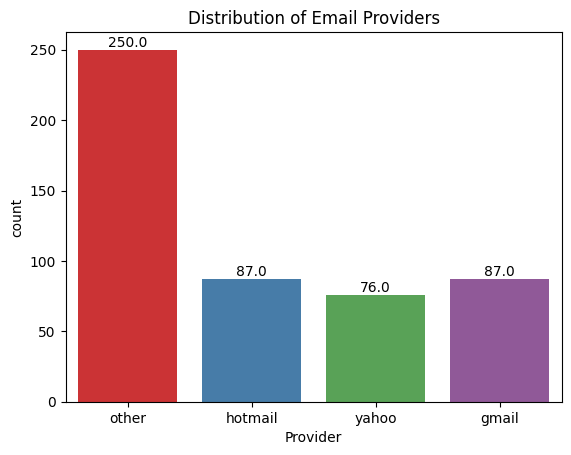

In [52]:
# Replace non-gmail, hotmail, yahoo providers with "other"
df_ecommerce.Provider = df_ecommerce.Provider.apply(lambda x: x if x in ["gmail", "hotmail", "yahoo"] else "other")

# Plot the countplot
sns.countplot(x=df_ecommerce.Provider, hue=df_ecommerce.Provider, palette="Set1")

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the title
plt.title('Distribution of Email Providers')

# Save the plot as a PNG file
plt.savefig('../images/email_providers_distribution.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

Now we can drop the feature Email

In [53]:
df_ecommerce.drop(["Email"], axis=1, inplace=True)

### 2.2.2. <a id='toc2_2_2_'></a>Address [&#9650;](#toc0_)

In [54]:
df_ecommerce_temp = df_ecommerce.copy()

In [55]:
for index, row in enumerate(df_ecommerce_temp['Address']):
    # Split the address into parts
    address_parts = row.split("\n")[1].split(",")
    
    if len(address_parts) > 1:
        # Extract city, state, and ZIP code when address has multiple parts
        city = address_parts[0]
        state_zip = address_parts[1].strip().split(" ")
        state = state_zip[0] if len(state_zip) > 0 else None
    else:
        # Handle cases where address is in a different format
        city_state_zip = address_parts[0].strip().split(" ")
        city = city_state_zip[0] if len(city_state_zip) > 0 else None
        state = city_state_zip[1] if len(city_state_zip) > 1 else None

    # Assign extracted values to the DataFrame
    df_ecommerce_temp.at[index, "City"] = city
    df_ecommerce_temp.at[index, "State"] = state

# Display the updated DataFrame
df_ecommerce_temp.head()

,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Provider,City,State
0,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,other,Wrightmouth,MI
1,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail,Diazchester,CA
2,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo,Cobbborough,DC
3,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail,Port Jason,OH
4,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,other,Port Jacobville,PR


We drop the Address column and check out the new features.

In [56]:
df_ecommerce = df_ecommerce_temp.drop("Address", axis=1).copy()

Users are mostly in different citys, but besides city names following variables wer extracted instead of the city:
- DPO (Diplomatic Post Office): Used for mail sent to U.S. diplomatic missions abroad.
- APO (Army Post Office): Used for mail sent to Army or Air Force installations.
- FPO (Fleet Post Office): Used for mail sent to Navy or Marine Corps installations.  
We will delete the city column and make a new one with the variables "Diplomatic", "Army" and "City"

In [57]:
df_ecommerce.City.value_counts()

City
DPO                      17
APO                      16
FPO                      13
Lake Matthew              2
Ramirezberg               2
                         ..
South Michaelburgh        1
Lake Christophershire     1
Langside                  1
Spencechester             1
East Drewborough          1
Name: count, Length: 449, dtype: int64

In [58]:
# Create a new column based on the city names
df_ecommerce['recipient'] = df_ecommerce['City'].apply(
    lambda x: 'Diplomatic' if 'DPO' in x else ('Military' if 'APO' in x or 'FPO' in x else 'Home'))

# Drop the original City column
df_ecommerce.drop('City', axis=1, inplace=True)

# Display the updated DataFrame
df_ecommerce.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Provider,State,recipient
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,other,MI,Home
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail,CA,Home
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo,DC,Home
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail,OH,Home
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,other,PR,Home


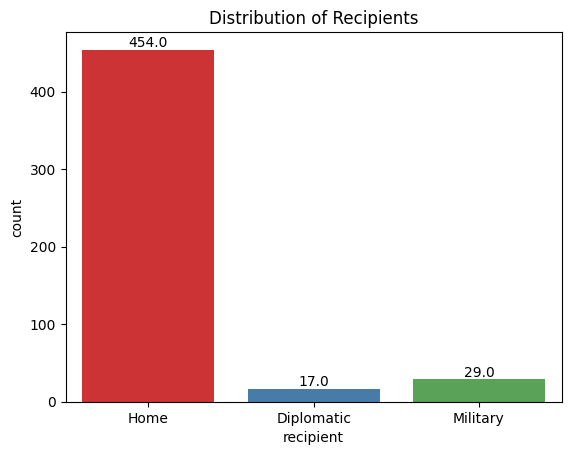

In [59]:
sns.countplot(x=df_ecommerce.recipient, hue=df_ecommerce.recipient, palette="Set1")

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the title
plt.title('Distribution of Recipients')

# Save the plot as a PNG file
plt.savefig('../images/recipient_distribution.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

Next we look at the distribution of states.

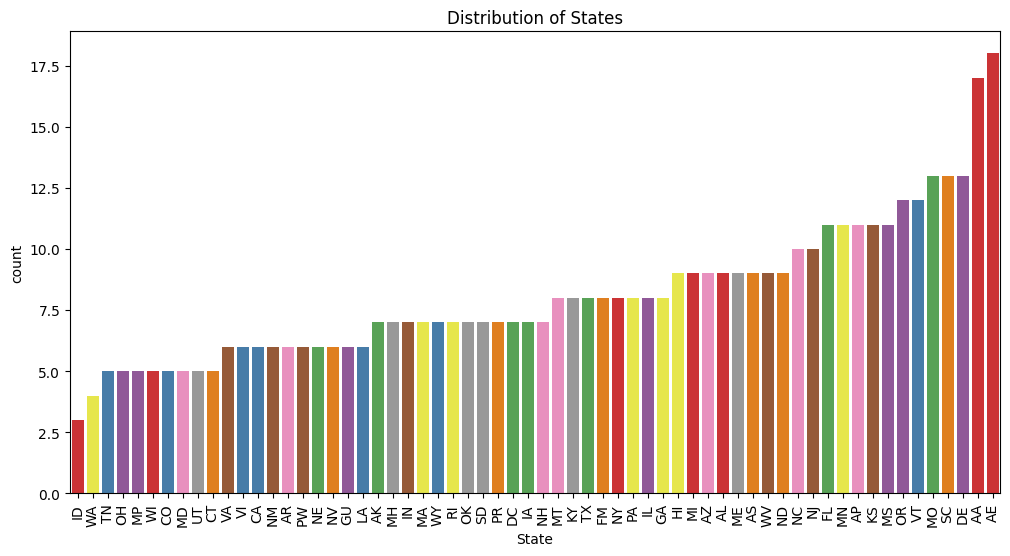

In [60]:
plt.figure(figsize=(12, 6))
state_counts = df_ecommerce.State.value_counts().sort_values()
sns.countplot(x=df_ecommerce.State, hue=df_ecommerce.State, order=state_counts.index, palette="Set1")
plt.xticks(rotation=90)
plt.title('Distribution of States')
plt.savefig('../images/distribution_of_states.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

### 2.2.3. <a id='toc2_2_3_'></a>Avatar [&#9650;](#toc0_)

In [61]:
df_ecommerce_temp = df_ecommerce.copy()

In [62]:
df_ecommerce.Avatar.unique()

array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
       'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
       'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
       'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
       'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
       'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
       'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
       'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
       'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
       'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
       'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
       'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
       'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
       'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
       'DarkKhaki', 'FireBrick', 'SlateGray',

We use github copilot to categorize the avatar colors into different color groups.

In [63]:
# Define color categories
color_groups = {
    'Green': ['DarkGreen', 'OliveDrab', 'SeaGreen', 'MediumSeaGreen', 'SpringGreen', 'LimeGreen', 'LightGreen', 'PaleGreen', 'ForestGreen', 'Green', 'LawnGreen', 'Chartreuse', 'MediumSpringGreen', 'Lime', 'DarkOliveGreen', 'DarkSeaGreen', 'GreenYellow', 'YellowGreen', 'Olive'],
    'Yellow': ['LemonChiffon', 'LightYellow', 'Khaki', 'Gold', 'Yellow', 'LightGoldenRodYellow', 'PaleGoldenRod', 'DarkKhaki'],
    'Blue': ['RoyalBlue', 'DarkBlue', 'MediumBlue', 'SkyBlue', 'DeepSkyBlue', 'DodgerBlue', 'Blue', 'LightBlue', 'CornflowerBlue', 'SlateBlue', 'MediumSlateBlue', 'DarkSlateBlue', 'Navy', 'MidnightBlue', 'Aqua', 'PowderBlue', 'Cyan', 'LightSeaGreen', 'Teal', 'SteelBlue', 'DarkTurquoise', 'Indigo', 'Turquoise', 'LightSteelBlue', 'PaleTurquoise', 'LightSkyBlue', 'Aquamarine', 'Azure', 'MediumTurquoise', 'DeepSkyBlue', 'DodgerBlue'],
    'Red': ['Tomato', 'FireBrick', 'Crimson', 'Red', 'IndianRed', 'DarkRed', 'Salmon', 'DarkSalmon', 'LightSalmon', 'DeepPink', 'HotPink', 'Pink', 'PaleVioletRed', 'RosyBrown', 'LightCoral', 'MistyRose'],
    'Gray': ['Black', 'DimGray', 'Gray', 'SlateGray', 'DarkSlateGray', 'LightSlateGray', 'DarkGray', 'LightGray', 'Silver', 'Gainsboro', 'WhiteSmoke', 'GhostWhite', 'Snow', 'Linen', 'MintCream', 'Ivory', 'OldLace', 'AntiqueWhite', 'AliceBlue', 'SeaShell', 'Beige'],
    'Purple': ['Violet', 'DarkOrchid', 'DarkMagenta', 'BlueViolet', 'MediumVioletRed', 'MediumOrchid', 'MediumPurple', 'DarkViolet', 'Purple', 'LavenderBlush', 'Thistle', 'Orchid', 'Lavender', 'Magenta', 'Fuchsia'],
    'Orange': ['DarkOrange', 'OrangeRed', 'Orange', 'Coral', 'LightSalmon', 'Salmon', 'DarkSalmon', 'PeachPuff', 'Moccasin', 'PapayaWhip', 'Bisque', 'BlanchedAlmond', 'NavajoWhite', 'Wheat', 'BurlyWood', 'Tan', 'SandyBrown', 'GoldenRod', 'DarkGoldenRod', 'Peru', 'Chocolate', 'Sienna', 'SaddleBrown', 'Brown'],
    'White': ['FloralWhite', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Snow', 'Linen', 'MintCream', 'Azure', 'Ivory', 'OldLace', 'AntiqueWhite', 'AliceBlue', 'SeaShell', 'Beige', 'White'],
    'Cyan': ['MediumAquaMarine', 'Aqua', 'PowderBlue', 'Cyan', 'LightSeaGreen', 'Teal', 'SteelBlue', 'DarkTurquoise', 'Indigo', 'Turquoise', 'LightSteelBlue', 'Cornsilk', 'DarkCyan', 'LightPink', 'BlanchedAlmond', 'CadetBlue', 'PaleTurquoise', 'LightSkyBlue', 'Aquamarine', 'MediumTurquoise', 'LightCyan']
}

# Function to categorize colors
def categorize_color_group(color):
    for group, colors in color_groups.items():
        if color in colors:
            return group
    return 'Unassigned'

# Apply the function to the DataFrame
df_ecommerce_temp['Color_group'] = df_ecommerce_temp['Avatar'].apply(categorize_color_group)

# Print colors which couldn't be assigned
unassigned_colors = df_ecommerce_temp[df_ecommerce_temp['Color_group'] == 'Unassigned']['Avatar'].unique()
print("Unassigned Colors:", unassigned_colors)

# Display the updated DataFrame
df_ecommerce_temp.head()

Unassigned Colors: []


,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Provider,State,recipient,Color_group
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,other,MI,Home,Purple
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail,CA,Home,Green
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo,DC,Home,Orange
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail,OH,Home,Orange
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,other,PR,Home,Cyan


Most people used blue shaded colors.

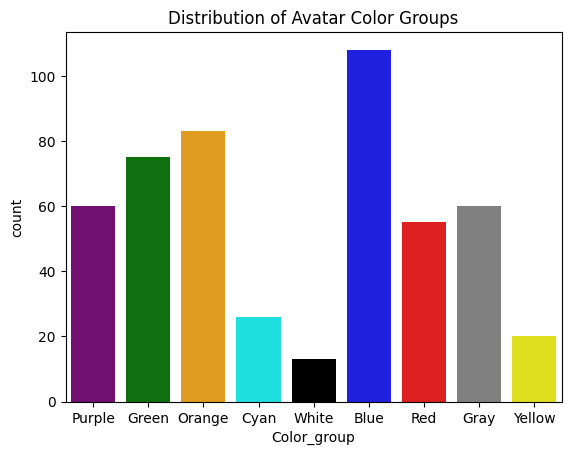

In [64]:
# Define a color palette for the Color_group
color_palette = {
    'Green': 'green',
    'Yellow': 'yellow',
    'Blue': 'blue',
    'Red': 'red',
    'Gray': 'gray',
    'Purple': 'purple',
    'Orange': 'orange',
    'White': 'black',
    'Cyan': 'cyan'
}

# Plot the countplot with the custom color palette
sns.countplot(x=df_ecommerce_temp['Color_group'], hue=df_ecommerce_temp['Color_group'], palette=color_palette)
plt.title('Distribution of Avatar Color Groups')
plt.savefig('../images/avatar_color_groups_distribution.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [65]:
df_ecommerce = df_ecommerce_temp.drop("Avatar", axis=1).copy()

In [66]:
df_ecommerce.dtypes

Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
Provider                 object
State                    object
recipient                object
Color_group              object
dtype: object

# 3. <a id='toc3_'></a>EDA [&#9650;](#toc0_)

## 3.1. <a id='toc3_1_'></a>Target [&#9650;](#toc0_)

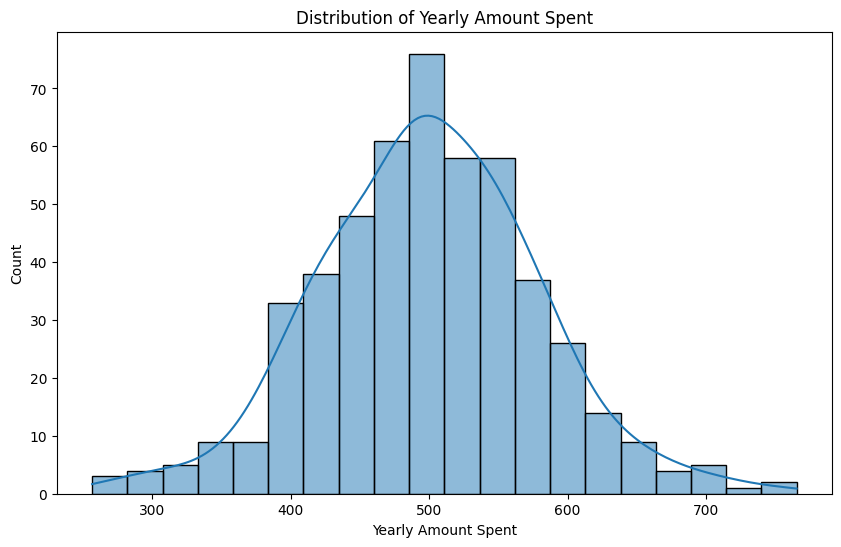

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ecommerce["Yearly Amount Spent"], kde=True)
plt.title('Distribution of Yearly Amount Spent')
plt.savefig('../images/yearly_amount_spent_distribution.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [68]:
df_ecommerce

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Provider,State,recipient,Color_group
0,34.497268,12.655651,39.577668,4.082621,587.951054,other,MI,Home,Purple
1,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail,CA,Home,Green
2,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo,DC,Home,Orange
3,34.305557,13.717514,36.721283,3.120179,581.852344,gmail,OH,Home,Orange
4,33.330673,12.795189,37.536653,4.446308,599.406092,other,PR,Home,Cyan
...,...,...,...,...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438,other,UT,Home,Orange
496,34.702529,11.695736,37.190268,3.576526,529.049004,gmail,CA,Home,Red
497,32.646777,11.499409,38.332576,4.958264,551.620145,hotmail,TN,Home,Cyan
498,33.322501,12.391423,36.840086,2.336485,456.469510,hotmail,TX,Home,Blue


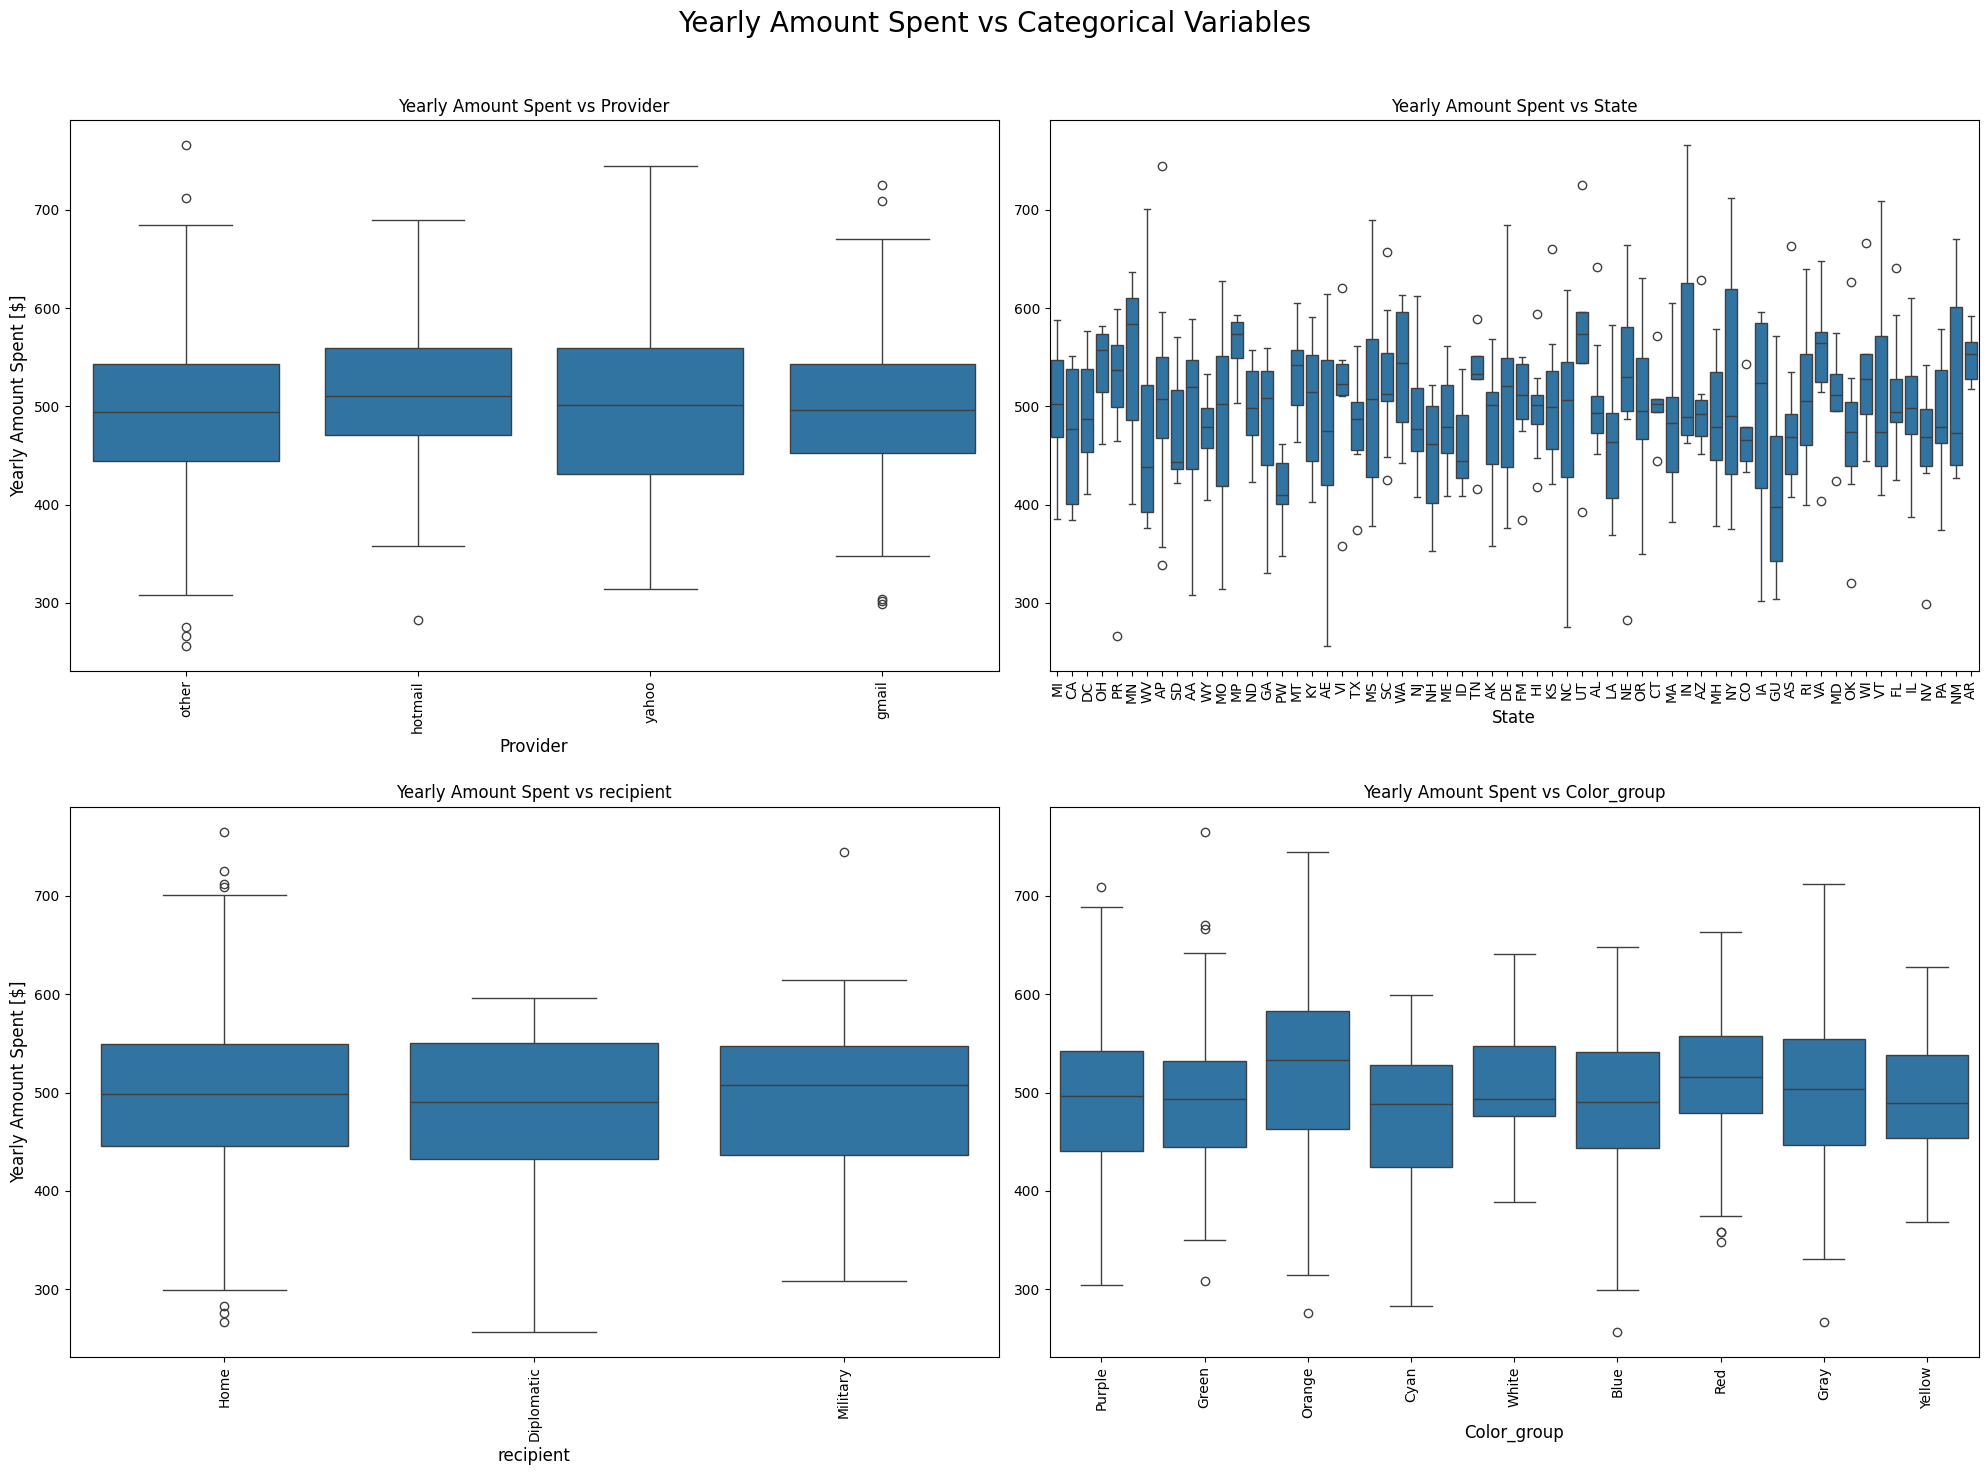

In [69]:
categorical_columns = df_ecommerce.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 15))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=column, y='Yearly Amount Spent', data=df_ecommerce)
    plt.xticks(rotation=90)
    plt.title(f'Yearly Amount Spent vs {column}')
    if i % 2 == 1:  # Show y-axis label only for the first plot in each row
        plt.ylabel('Yearly Amount Spent [$]', fontsize=12)
    else:
        plt.ylabel('')
    plt.xlabel(column, fontsize=12)

plt.suptitle('Yearly Amount Spent vs Categorical Variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=2.0)
plt.savefig('../images/yearly_amount_spent_vs_categorical_variables.png', dpi=300)
plt.show()

There is no major difference in the yearly amount spent across different categories of categorical columns. Furthermore the groups don't have enough data points.

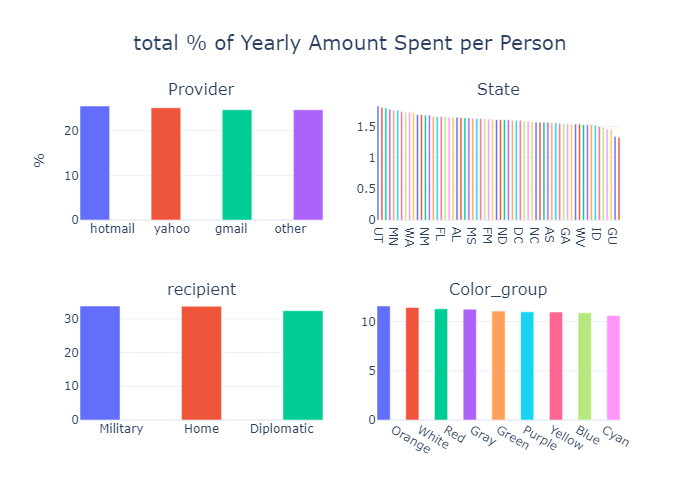

In [70]:
categorical_columns = df_ecommerce.select_dtypes(include=['object']).columns
fig = make_subplots(rows=2, cols=2, subplot_titles=categorical_columns)

col = 1
row = 1

for i, column in enumerate(categorical_columns, 1):
    group = df_ecommerce.groupby(column).agg({"Yearly Amount Spent": "sum", "Time on Website": "count"})
    group["Yearly Amount Spent per Person"] = group["Yearly Amount Spent"] / group["Time on Website"]
    group.sort_values(by="Yearly Amount Spent per Person", ascending=False, inplace=True)
    group["total % Yearly Amount Spent per Person"] = round(group["Yearly Amount Spent per Person"] / group["Yearly Amount Spent per Person"].sum() * 100, 2)
    
    fig1 = px.bar(group, x=group.index, y='total % Yearly Amount Spent per Person', barmode="group", color=group.index)
    for trace in fig1['data']:
        trace['showlegend'] = False 
        fig.add_trace(trace, row=row, col=col)
        fig.update_traces(width=0.5)
    
    col = col + 1 if col < 2 else 1
    row = row + 1 if col == 1 else row

fig.update_layout(title_text="total % of Yearly Amount Spent per Person", title_font_size=20, title_x=0.5, template="plotly_white",
                  yaxis_title="%")

# Save the plot as a PNG file
pio.write_image(fig, '../images/total_percentage_yearly_amount_spent_per_person.png', scale=2)

fig.show()


## 3.2. <a id='toc3_2_'></a>Heatemap and Correlation [&#9650;](#toc0_)

Yearly Amount Spent  highly correlates with lenght of membership and not at all with time on website.

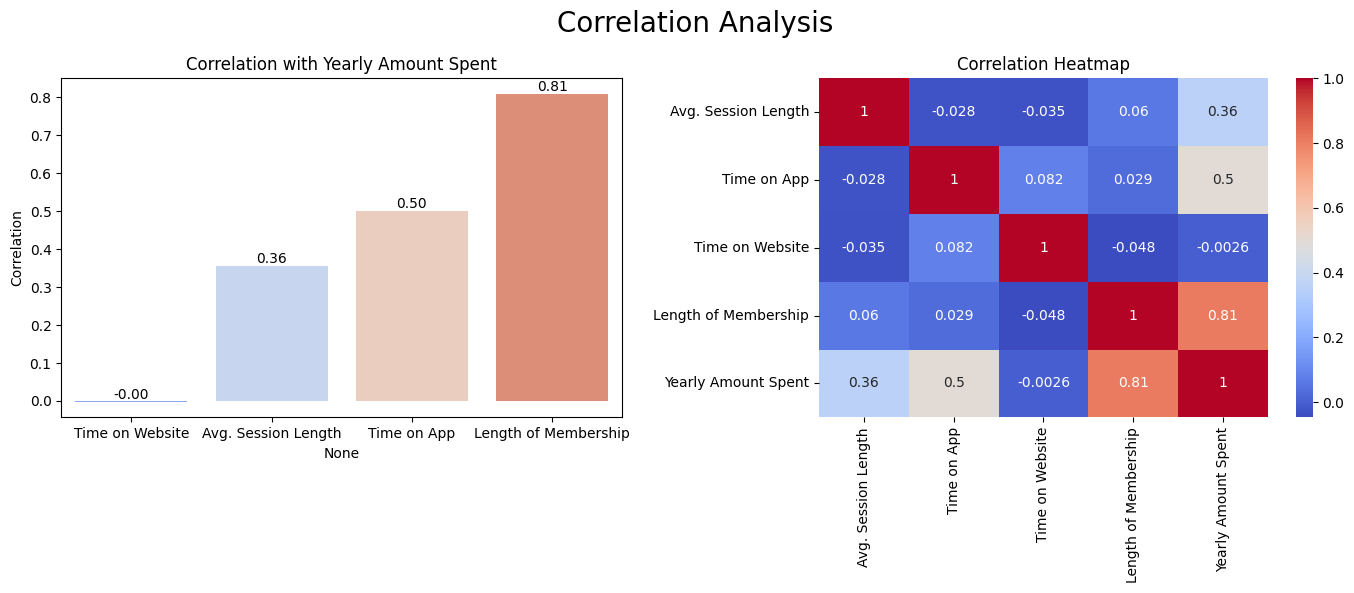

In [71]:
# Select only numeric columns
numeric_df = df_ecommerce.select_dtypes(include=[np.number])

# Create the bar plot for correlations with Yearly Amount Spent
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
correlation_with_target = numeric_df.corr()['Yearly Amount Spent'].drop('Yearly Amount Spent').sort_values()
ax = sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, hue=correlation_with_target.index, palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Correlation with Yearly Amount Spent')
plt.ylabel('Correlation')

# Create the heatmap
plt.subplot(1, 2, 2)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')

plt.suptitle('Correlation Analysis', fontsize=20)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../images/correlation_analysis.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## 3.3. <a id='toc3_3_'></a>Bi-varaite Analysis [&#9650;](#toc0_)

The trendlines show minimal slope for most of the plots. Again Length of membership, time on app and avg. session length have the highest corrrelation.

<Figure size 2000x1500 with 0 Axes>

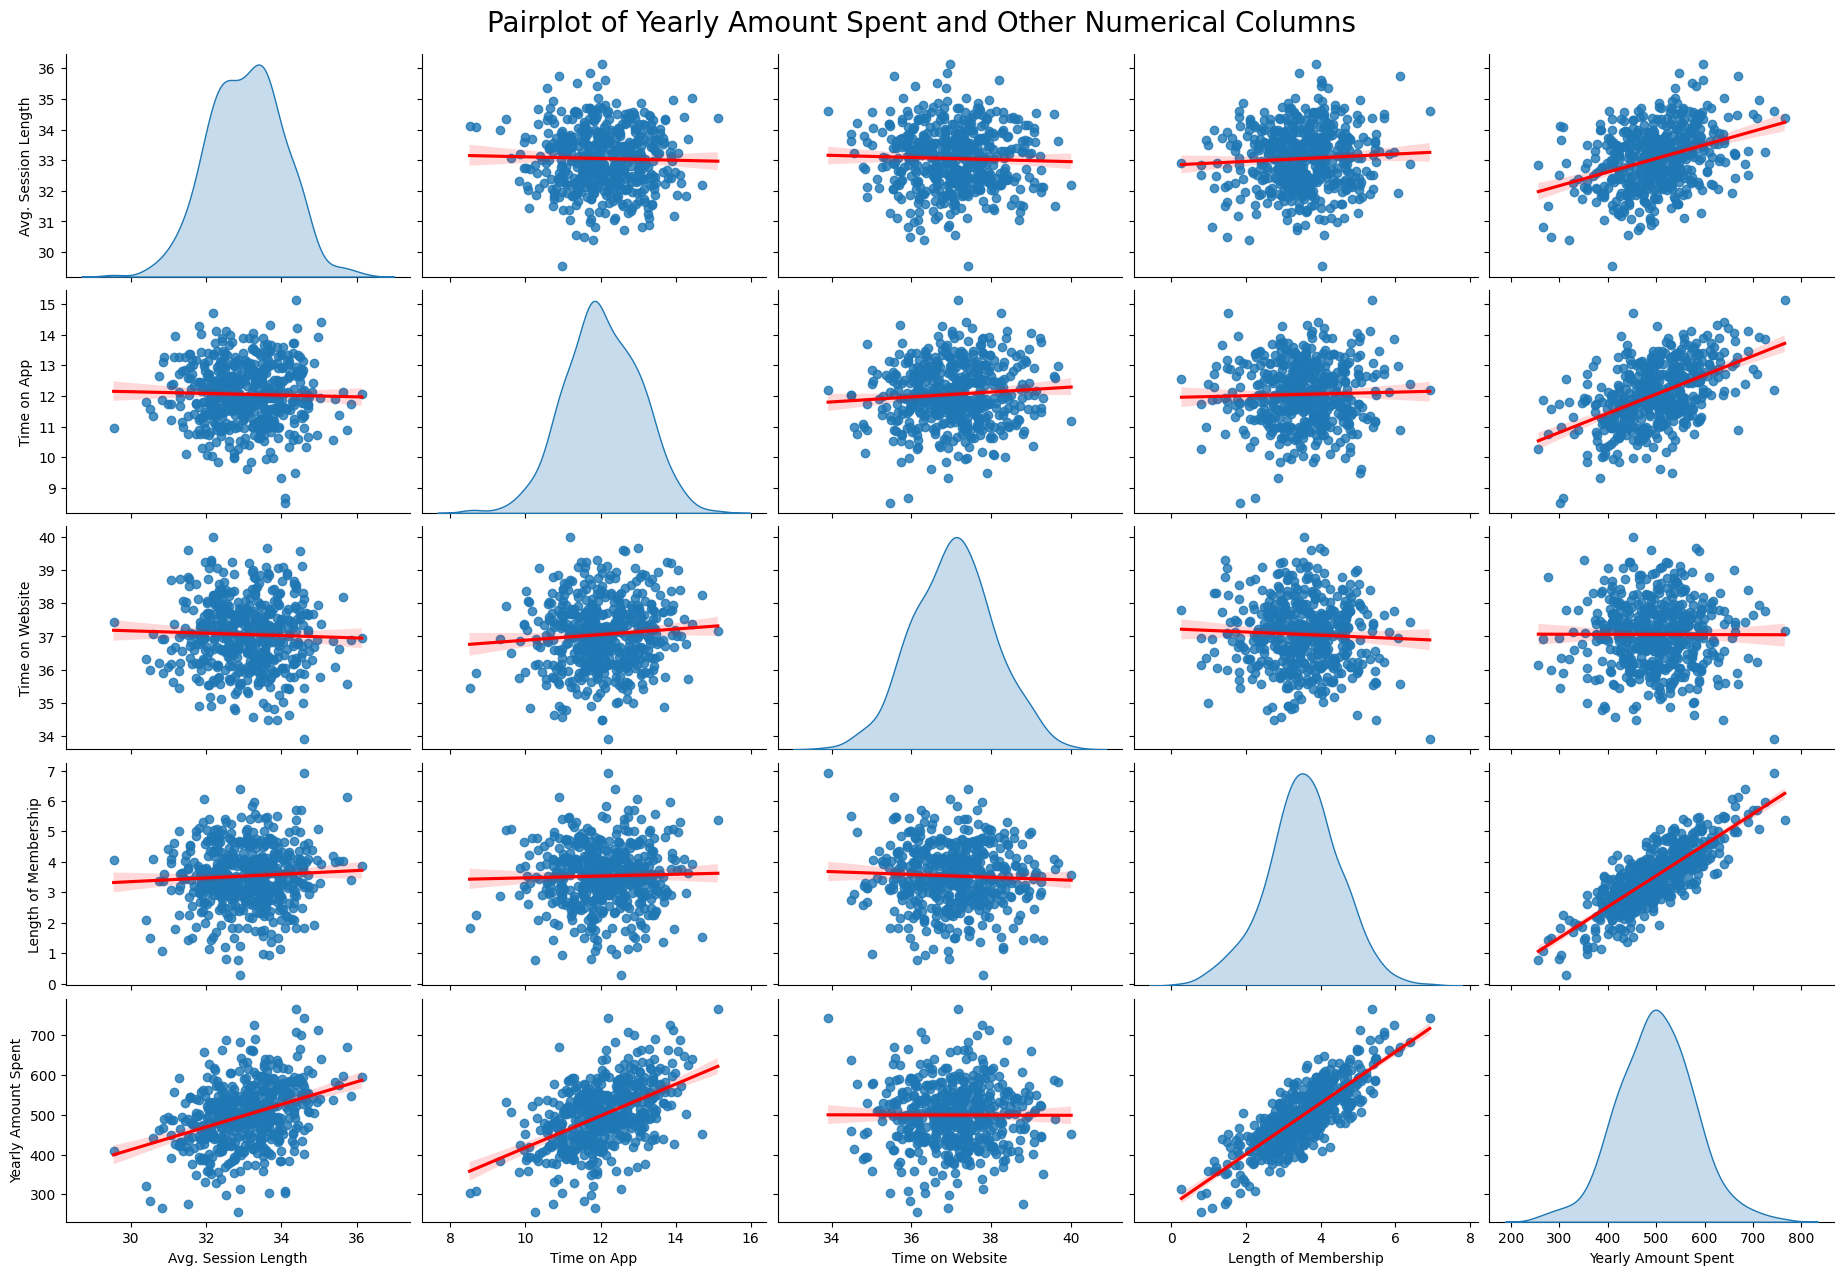

In [72]:
# Create a pairplot to visualize the relationship between "Yearly Amount Spent" and other numerical columns
plt.figure(figsize=(20, 15))
pairplot_fig = sns.pairplot(df_ecommerce, aspect=1.5, kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}})
pairplot_fig.fig.suptitle('Pairplot of Yearly Amount Spent and Other Numerical Columns', y=1.02, fontsize=20)
pairplot_fig.savefig('../images/pairplot_yearly_amount_spent.png', dpi=300, bbox_inches='tight')
plt.show()


# 4. <a id='toc4_'></a>Machine Learning [&#9650;](#toc0_)

In the EDA we saw that the categorical variables have no impact on the target, so we will ditch those for our ML model.

## 4.1. <a id='toc4_1_'></a>Preprocessing [&#9650;](#toc0_)

### 4.1.1. <a id='toc4_1_1_'></a>Scaling [&#9650;](#toc0_)

Data neeeds to be scaled.

<Axes: >

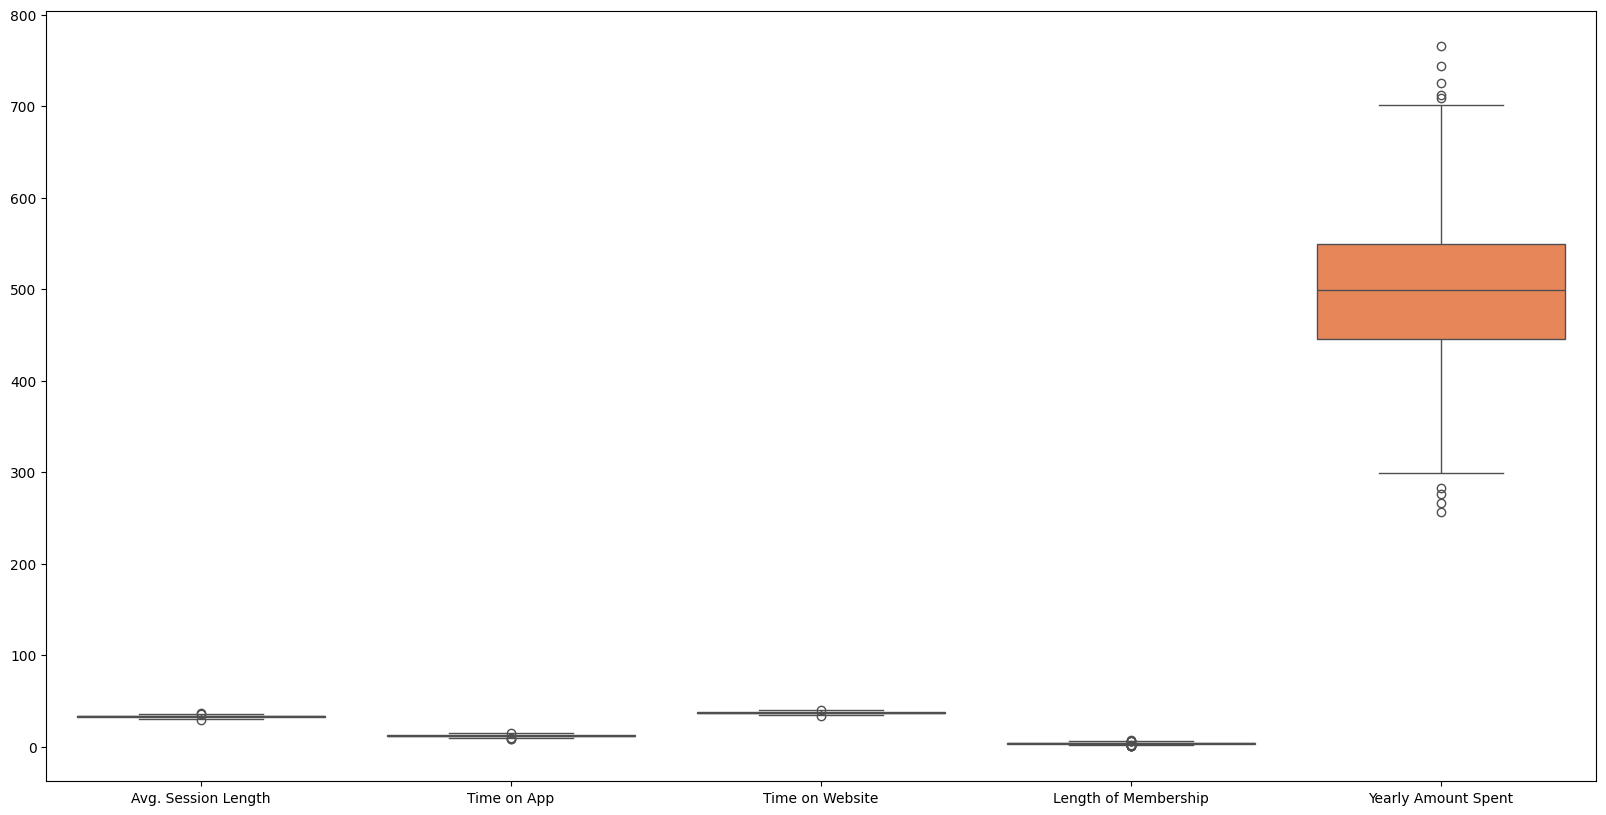

In [73]:
data = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']
target = ['Yearly Amount Spent']
plt.figure(figsize=(20,10))
sns.boxplot(data=df_ecommerce[data+target], orient='v', palette='rainbow')

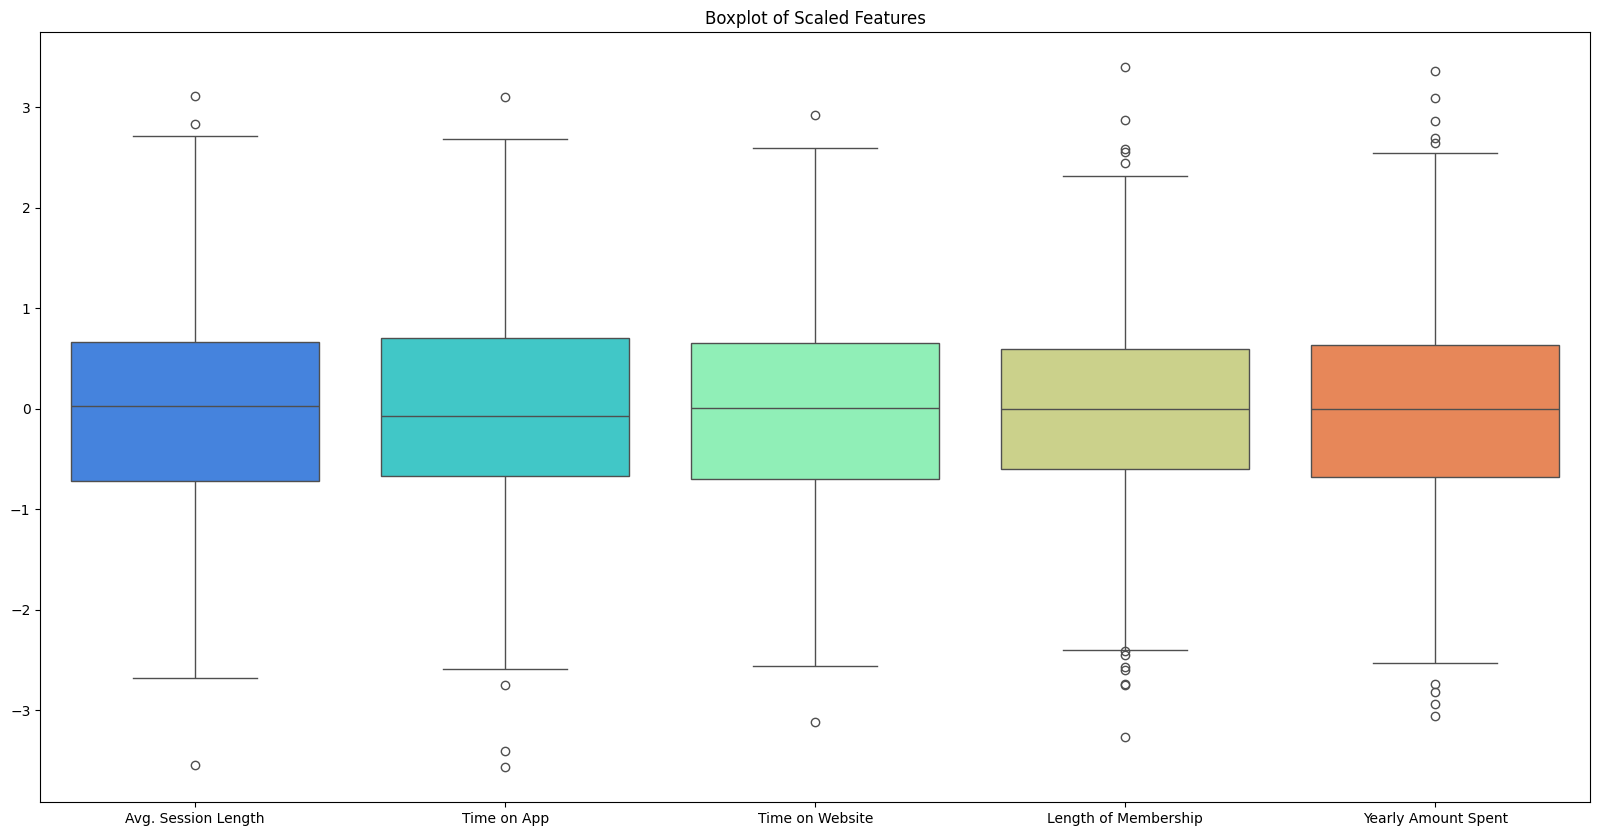

In [74]:
# Scaling non-target columns
scaler = StandardScaler()
scaler.fit(df_ecommerce[data + target])
df_scaled = scaler.transform(df_ecommerce[data + target])
df_scaled = pd.DataFrame(df_scaled, columns=df_ecommerce[data + target].columns)

# Plotting
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_scaled, orient='v', palette='rainbow')
plt.title('Boxplot of Scaled Features')
plt.savefig('../images/boxplot_scaled_features.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

### 4.1.2. <a id='toc4_1_2_'></a>Winsorizing [&#9650;](#toc0_)

One way to reduce the impact of outliers on model building without reducing the dataset (i.e., simply deleting the outliers) is to set outliers to less extreme variable values. This is generally referred to as ***Winsorizing***. To do this, an interval of permissible feature values is defined between the extreme values High and Low.  
High is defined, for example, as the 75% quartile + 1.5 interquartile range(IQR).  
And Low is defined analogously as the 25$ - 1.5 interquartile range.
The interquartile range is the difference between the 75% and 25% quartiles.
The following code implements such an approach with the scaled features:

In [75]:
def winsorizing(df):
    features = df.columns
    for feature in features:
        # Quartiles
        q1 = df[feature].describe()['25%']
        q3 = df[feature].describe()['75%']
        # Interquartile range
        IQR = q3 - q1
        high = q3 + (1.5*IQR)
        # data indices above high
        out_data_1 = df[df[feature] > high]
        idx_1 = out_data_1.index.values
        
        # substitute data above high with high
        for j in idx_1:
            df.loc[j, feature] = high
        
        # same for low
        low = q1 - (1.5*IQR)
        out_data_2 = df[df[feature] < low]
        idx_2 = out_data_2.index.values
        
        for k in idx_2:
            df.loc[k, feature] = low
    return df

<Axes: >

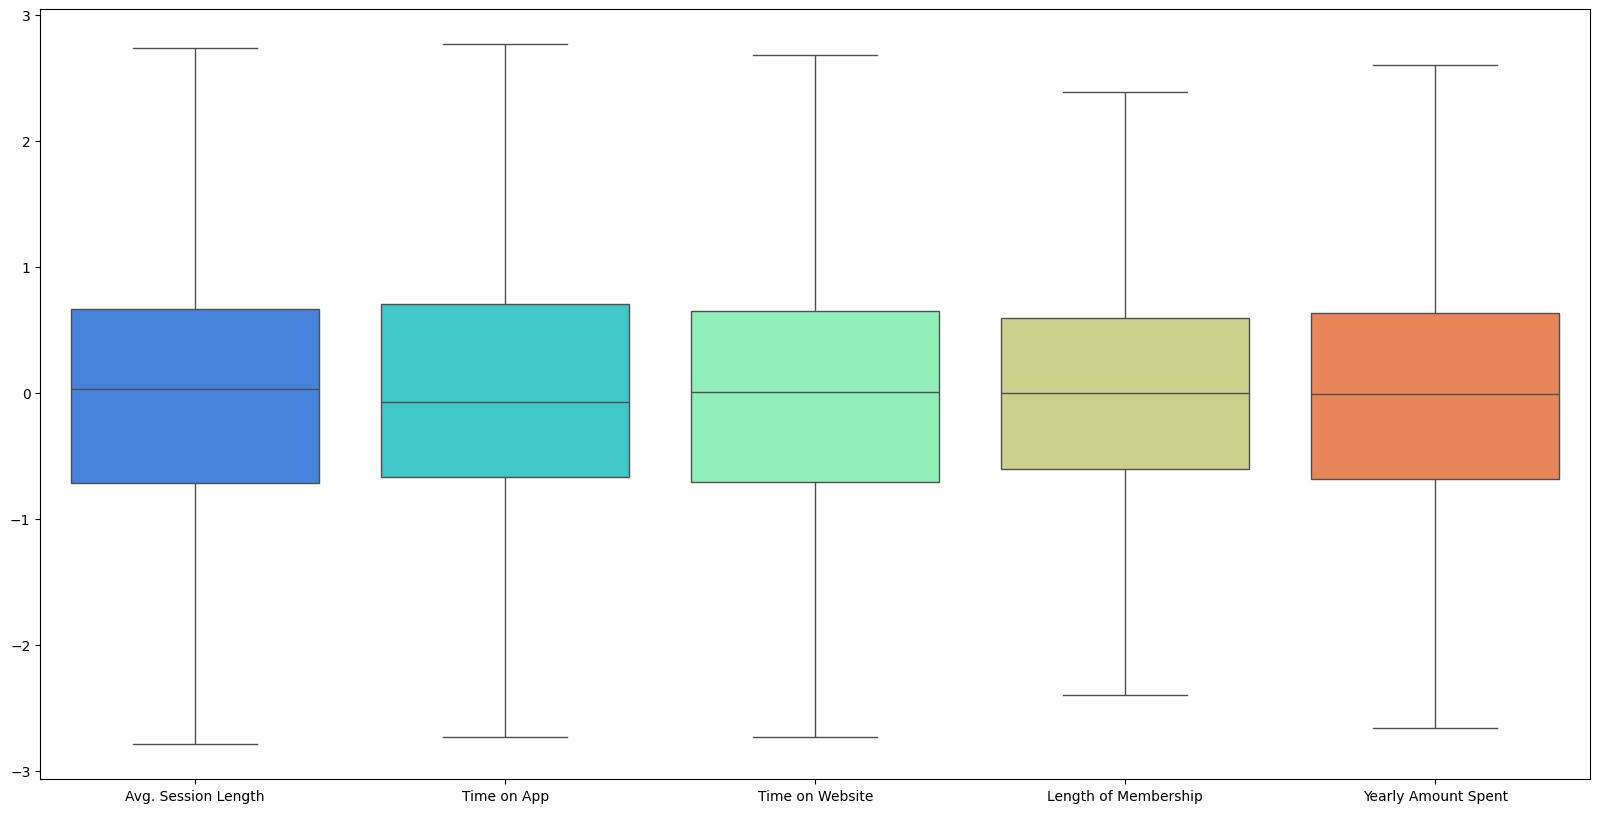

In [76]:
df_winsorized = winsorizing(df_scaled)
plt.figure(figsize=(20,10))
sns.boxplot(data = df_winsorized, orient='v', palette='rainbow')

# 5. <a id='toc5_'></a>Linear Regression [&#9650;](#toc0_)

In [77]:
# evaluation metrics
def metriken(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, r2, rmse

In [78]:
data = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']
target = ['Yearly Amount Spent']

# winsorize
df_ecommerce_winsorized = winsorizing(df_ecommerce[data+target].copy())

# splitt
df = df_ecommerce_winsorized[data+target]
train, test = train_test_split(df, test_size=0.3, random_state=42)

# Scaler
scaler = StandardScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)
train_scaled = pd.DataFrame(train_scaled, columns = train.columns)
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns = test.columns)

# Split to X and y
X_train = train_scaled[data]
y_train = train_scaled[target]
X_test = test_scaled[data]
y_test = test_scaled[target]

### 5.1.1. <a id='toc5_1_1_'></a>evaluation [&#9650;](#toc0_)

First we look at the coefficients of the model. The higher the coefficient, the higher is the correlation between the target and the feature

In [79]:
# set and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# print coefficients
coefficients = pd.DataFrame(lm.coef_.round(4), columns=X_train.columns, index=["Coefficients"])
coefficients.T

,Coefficients
Avg. Session Length,0.3137
Time on App,0.4765
Time on Website,0.0041
Length of Membership,0.7814


After that, we look at the metrics MAE, R2, RMSE

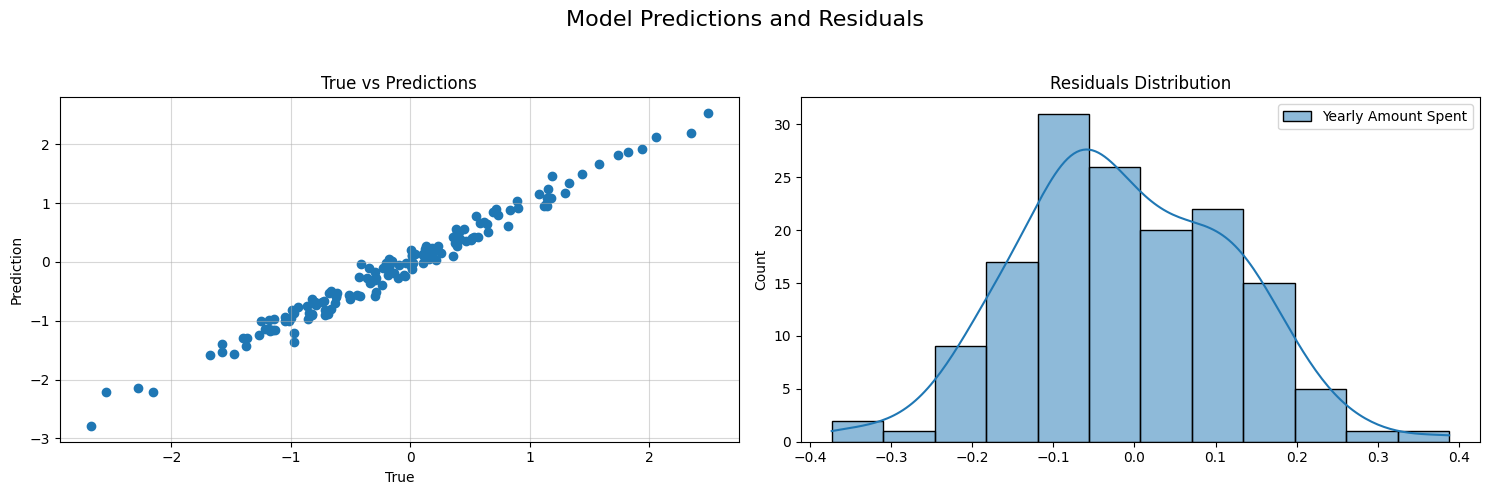

Residual mean: -0.0115


In [80]:
# prediction
predictions = lm.predict(X_test)

# Lösung
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axs[0].scatter(y_test, predictions)
axs[0].grid(True, alpha=0.5)
axs[0].set_ylabel('Prediction')
axs[0].set_xlabel('True')
axs[0].set_title('True vs Predictions')

# Histogram plot
sns.histplot((y_test - predictions), kde=True, ax=axs[1])
axs[1].set_title('Residuals Distribution')

# Set the main title
fig.suptitle('Model Predictions and Residuals', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('../images/model_predictions_and_residuals.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

print(f"Residual mean: {np.mean(y_test - predictions).round(4)}")

the model looks good, the residuals are normally distributed and the mean is almost 0. Also the R2 score is 0.98, which is very good and the RMSE is 0.13, which is also very good.

In [81]:
mae, r2, rmse = metriken(y_test, predictions)
pd.DataFrame({"MAE": [mae], "R2": [r2], "RMSE": [rmse]})


,MAE,R2,RMSE
0,0.107061,0.979905,0.130537


# 6. <a id='toc6_'></a>Conclusion [&#9650;](#toc0_)

We still want to find the answer to the original question: Should the company focus its efforts (and limited resources) more on further developing the mobile app or the website? Or maybe it doesn’t matter, and the membership duration is what really matters. 
The linear Regression model showed that the length of the membership is the most important feature, but it can't be actively changed. Therefore the company should spend it's recources in developing the app, because this one is the next highest contributor to the amount spend yearly, while the time spent on the website only have a minimal effect.

In [82]:
# saving images as summarizing image

# List of image filenames in the order you want them to appear
image_filenames = [
    'distribution_of_features.png',
    'email_providers_distribution.png',
    'recipient_distribution.png',
    'distribution_of_states.png',
    'avatar_color_groups_distribution.png',
    'yearly_amount_spent_distribution.png',
    'yearly_amount_spent_vs_categorical_variables.png',
    'total_percentage_yearly_amount_spent_per_person.png',
    'correlation_analysis.png',
    'pairplot_yearly_amount_spent.png',
    'model_predictions_and_residuals.png',
    'boxplot_scaled_features.png'
]

# Load images
images = [Image.open(os.path.join('../images', filename)) for filename in image_filenames]

# Resize images to be quadratic (square) or rectangular as specified
min_side = min(images[0].size)
quadratic_images = [
    'email_providers_distribution.png',
    'recipient_distribution.png',
    'avatar_color_groups_distribution.png',
    'yearly_amount_spent_distribution.png',
    'pairplot_yearly_amount_spent.png',
    'boxplot_scaled_features.png'
]
rectangular_images = [
    'distribution_of_features.png',
    'distribution_of_states.png',
    'yearly_amount_spent_vs_categorical_variables.png',
    'total_percentage_yearly_amount_spent_per_person.png',
    'correlation_analysis.png',
    'model_predictions_and_residuals.png'
]

for i, img in enumerate(images):
    if image_filenames[i] in quadratic_images:
        images[i] = img.resize((min_side, min_side))
    elif image_filenames[i] in rectangular_images:
        images[i] = img.resize((min_side * 2, min_side))

# Calculate the size of the final image
num_images = len(images)
rows, cols = 3, 6
final_image_width = min_side * cols
final_image_height = min_side * rows

# Create a new blank image
final_image = Image.new('RGB', (final_image_width, final_image_height))

# Manually paste images into the final image
# First row
final_image.paste(images[1], (0, 0))  # email_providers_distribution.png
final_image.paste(images[2], (1770, 0))  # recipient_distribution.png
final_image.paste(images[4], (3540, 0))  # avatar_color_groups_distribution.png
final_image.paste(images[5], (5310, 0))  # yearly_amount_spent_distribution.png
final_image.paste(images[9], (7080, 0))  # pairplot_yearly_amount_spent.png
final_image.paste(images[11], (8850, 0))  # boxplot_scaled_features.png

# Second row
final_image.paste(images[0], (0, 1770))  # distribution_of_features.png
final_image.paste(images[3], (3540, 1770))  # distribution_of_states.png
final_image.paste(images[6], (7080, 1770))  # yearly_amount_spent_vs_categorical_variables.png

# Third row
final_image.paste(images[7], (0, 3540))  # total_percentage_yearly_amount_spent_per_person.png
final_image.paste(images[8], (3540, 3540))  # correlation_analysis.png
final_image.paste(images[10], (7080, 3540))  # model_predictions_and_residuals.png

# Save the final image
final_image.save('../images/summary.png')
final_image.show()
